# Fleri Pricing Structure Predition
Author: Loretta Agyemang <br>


In [3]:
# Import packages 

import pandas as pd
import numpy as np 
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
sns.set()
import warnings
warnings.filterwarnings("ignore")

# Machine learning packages
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV


In [4]:
data = pd.read_csv('pricingstructure.csv')

data.head()

,Category,Country,Age range,Plan type,Product name,Payment Schedule,partner name,Base Price,Convenience fee,Selling Price,Platform fee,Total Revenue
0,Comprehensive,Ghana,0-59,Single,Fleri Bronze,Monthly,Nationwide,29.0,39.2,68.15,2.03,70.18
1,Comprehensive,Ghana,0-59,Single,Fleri Silver,Monthly,Nationwide,39.0,52.7,91.65,2.73,94.38
2,Comprehensive,Ghana,0-59,Single,Fleri Gold,Monthly,Nationwide,57.0,77.0,133.95,3.99,137.94
3,Comprehensive,Ghana,0-59,Single,Fleri Platinum,Monthly,Nationwide,70.0,94.5,164.50,4.90,169.40
4,Comprehensive,Ghana,60-69,Single,Fleri Bronze,Monthly,Nationwide,32.0,43.2,75.20,2.24,77.44


In [50]:
data['Payment Schedule'].unique()

array(['Monthly', 'Quarterly', 'Semi-annual', 'Annual'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
Category            240 non-null object
Country             240 non-null object
Age range           240 non-null object
Plan type           240 non-null object
Product name        240 non-null object
Payment Schedule    240 non-null object
partner name        240 non-null object
Base Price          240 non-null float64
Convenience fee     240 non-null float64
Selling Price       240 non-null float64
Platform fee        240 non-null float64
Total Revenue       240 non-null float64
dtypes: float64(5), object(7)
memory usage: 22.6+ KB


In [6]:
data['Base Price'].isnull().sum()

0

In [7]:
data['partner name'].unique()

array(['Nationwide', 'Glico', 'RelianceHMO'], dtype=object)

In [8]:
data['Product name'].unique()

array(['Fleri Bronze', 'Fleri Silver', 'Fleri Gold', 'Fleri Platinum'],
      dtype=object)

In [9]:
# Subset by partner name 

nationwide = data[data["partner name"] == "Nationwide"]

nationwide.shape

(144, 12)

In [10]:
reliance = data[data["partner name"] == "RelianceHMO"]

reliance.tail()

,Category,Country,Age range,Plan type,Product name,Payment Schedule,partner name,Base Price,Convenience fee,Selling Price,Platform fee,Total Revenue
155,Comprehensive,Nigeria,0-80,Single,Fleri Gold,Annual,RelianceHMO,206.0,278.1,484.10,20.60,504.70
156,Comprehensive,Nigeria,0-80,Single,Fleri Platinum,Monthly,RelianceHMO,71.5,96.5,168.03,7.15,175.18
157,Comprehensive,Nigeria,0-80,Single,Fleri Platinum,Quarterly,RelianceHMO,214.5,289.6,504.08,21.45,525.53
158,Comprehensive,Nigeria,0-80,Single,Fleri Platinum,Semi-annual,RelianceHMO,429.0,579.2,1008.15,42.90,1051.05
159,Comprehensive,Nigeria,0-80,Single,Fleri Platinum,Annual,RelianceHMO,858.0,1158.3,2016.30,85.80,2102.10


In [11]:
reliance.shape

(32, 12)

In [12]:
nationwide.head()

,Category,Country,Age range,Plan type,Product name,Payment Schedule,partner name,Base Price,Convenience fee,Selling Price,Platform fee,Total Revenue
0,Comprehensive,Ghana,0-59,Single,Fleri Bronze,Monthly,Nationwide,29.0,39.2,68.15,2.03,70.18
1,Comprehensive,Ghana,0-59,Single,Fleri Silver,Monthly,Nationwide,39.0,52.7,91.65,2.73,94.38
2,Comprehensive,Ghana,0-59,Single,Fleri Gold,Monthly,Nationwide,57.0,77.0,133.95,3.99,137.94
3,Comprehensive,Ghana,0-59,Single,Fleri Platinum,Monthly,Nationwide,70.0,94.5,164.50,4.90,169.40
4,Comprehensive,Ghana,60-69,Single,Fleri Bronze,Monthly,Nationwide,32.0,43.2,75.20,2.24,77.44


In [13]:
nationwide.shape

(144, 12)

In [51]:
nationwide['Payment Schedule'].unique()

array(['Monthly', 'Quarterly', 'Semi-annual', 'Annual'], dtype=object)

In [54]:
# Work with only monthly repayments

nm = nationwide[nationwide['Payment Schedule'] == 'Monthly']

nm.shape

(36, 12)

In [55]:
# Start with Nationwide - subset dataset 

cols = ["Plan type", "Product name", "Payment Schedule", "Base Price", "Convenience fee", "Selling Price", "Platform fee", "Total Revenue"]

ndata = nm[["Plan type", "Product name", "Payment Schedule", "Base Price", "Convenience fee", "Selling Price", "Platform fee", "Total Revenue"]]

ndata.head()

,Plan type,Product name,Payment Schedule,Base Price,Convenience fee,Selling Price,Platform fee,Total Revenue
0,Single,Fleri Bronze,Monthly,29.0,39.2,68.15,2.03,70.18
1,Single,Fleri Silver,Monthly,39.0,52.7,91.65,2.73,94.38
2,Single,Fleri Gold,Monthly,57.0,77.0,133.95,3.99,137.94
3,Single,Fleri Platinum,Monthly,70.0,94.5,164.50,4.90,169.40
4,Single,Fleri Bronze,Monthly,32.0,43.2,75.20,2.24,77.44


In [56]:
ndata.shape

(36, 8)

In [57]:
ndata.isnull().any()

Plan type           False
Product name        False
Payment Schedule    False
Base Price          False
Convenience fee     False
Selling Price       False
Platform fee        False
Total Revenue       False
dtype: bool

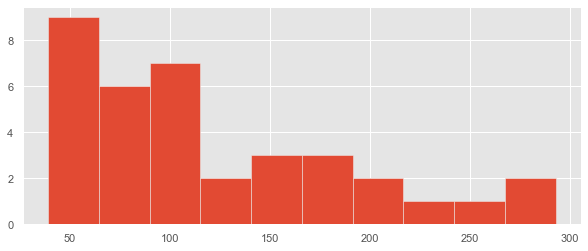

In [58]:
# Visualizations 

# Much less of a skew happening - most distribution around $50 - 100.

ndata["Convenience fee"].hist(figsize=(10, 4))


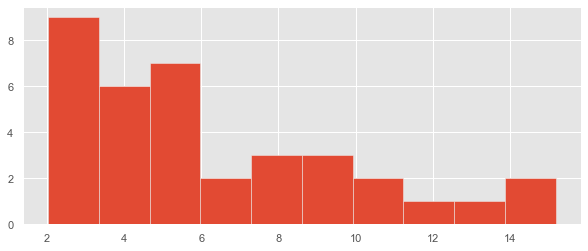

In [59]:
# More even looking spread

ndata["Platform fee"].hist(figsize=(10, 4))

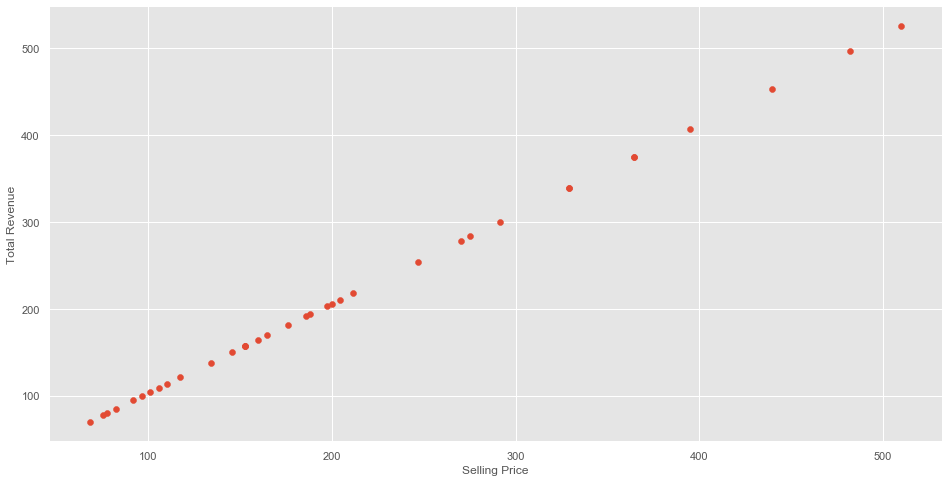

In [60]:
# Most of the selling price is clusterd on the lower end - less than $200

fig, ax = plt.subplots(figsize = (16,8))
ax.scatter(ndata['Selling Price'], ndata['Total Revenue'])
ax.set_xlabel('Selling Price')
ax.set_ylabel('Total Revenue')
plt.show()

There appears to be an almost perfect linear relationship between selling price and total revenue. As the selling price increases, so does total revenue.

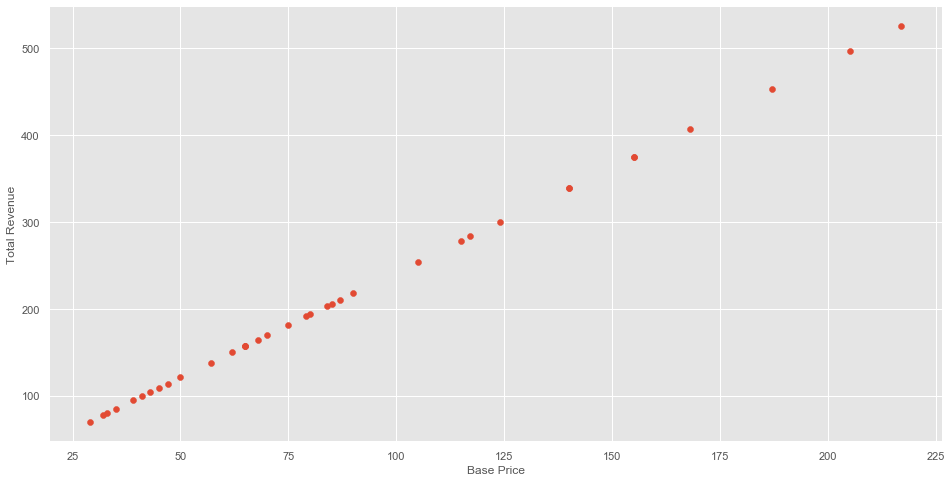

In [61]:
fig, ax = plt.subplots(figsize = (16,8))
ax.scatter(ndata['Base Price'], ndata['Total Revenue'])
ax.set_xlabel('Base Price')
ax.set_ylabel('Total Revenue')
plt.show()

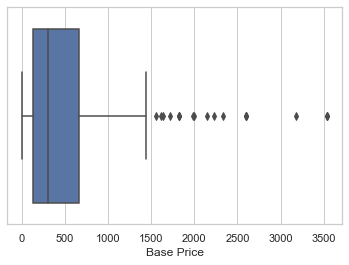

In [62]:
sns.set(style = "whitegrid")
ax = sns.boxplot(x=data['Base Price'])

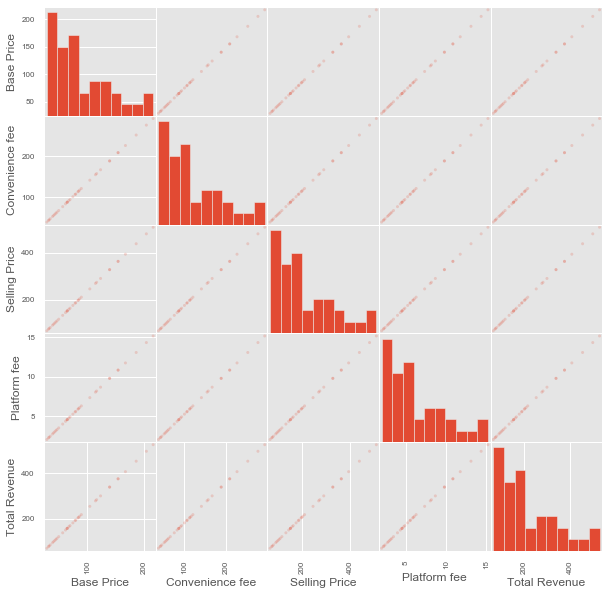

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix


scatter_matrix(ndata, alpha=0.2, figsize=(10, 10))
plt.show()

Since there is a perfect linear relationship for two variables with total revenue, the base model will be a linear regression.

# Linear Regression 

In [64]:
# Ok, so this model is saying that there's a perfect fit for predicting revenue.
# Most likely, there's too much colinarity and skenness for the standard regression to be useful.

X = ndata[['Base Price', 'Convenience fee', 'Selling Price', 'Platform fee']]
y = ndata['Total Revenue']

# Add a constant 
X = sm.add_constant(X)

# Fit model 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print model summary 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          Total Revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.712e+26
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:13:58   Log-Likelihood:                 820.94
No. Observations:                  36   AIC:                            -1636.
Df Residuals:                      33   BIC:                            -1631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.208e-13   1.32e-11     

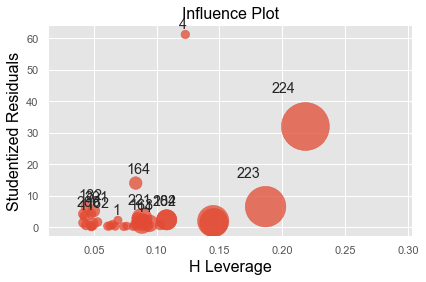

In [65]:
# Plot residuals

fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

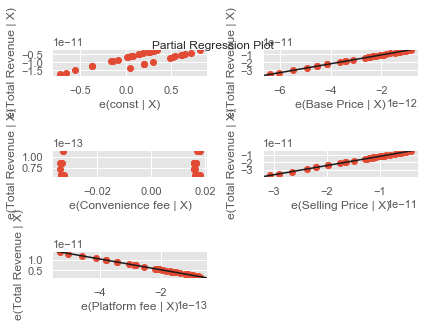

In [66]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.5)

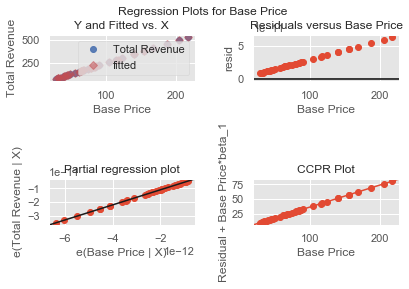

In [67]:
fig = sm.graphics.plot_regress_exog(model, "Base Price")
fig.tight_layout(pad = 2.0)

In [ ]:
# https://scipy-lectures.org/packages/scikit-learn/index.html

# Random Forest Regressor

In [68]:
# Create X & y matrices to make splits

# features
X = ndata[["Plan type", "Product name", "Payment Schedule", "Base Price", "Convenience fee", "Selling Price", "Platform fee"]]

# target
y = ndata["Total Revenue"]

In [69]:
# Encode categorical variables

X_encoded = pd.get_dummies(X)

X_encoded.shape

(36, 15)

In [70]:
X_encoded.head()

,Base Price,Convenience fee,Selling Price,Platform fee,Plan type_Family 2,Plan type_Family 3,Plan type_Family 4,Plan type_Family 5,Plan type_Family 6,Plan type_Single,Product name_Fleri Bronze,Product name_Fleri Gold,Product name_Fleri Platinum,Product name_Fleri Silver,Payment Schedule_Monthly
0,29.0,39.2,68.15,2.03,0,0,0,0,0,1,1,0,0,0,1
1,39.0,52.7,91.65,2.73,0,0,0,0,0,1,0,0,0,1,1
2,57.0,77.0,133.95,3.99,0,0,0,0,0,1,0,1,0,0,1
3,70.0,94.5,164.50,4.90,0,0,0,0,0,1,0,0,1,0,1
4,32.0,43.2,75.20,2.24,0,0,0,0,0,1,1,0,0,0,1


In [71]:
# Make 80/20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42)

In [72]:
# Create object and fit onto training set

start_time = time.time()

rf_reg = RandomForestRegressor(random_state=45)

%time rf_reg.fit(X_train, y_train)

Wall time: 8.98 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=45, verbose=0,
                      warm_start=False)

In [73]:
rf_reg.score(X_train, y_train)

0.9980230217919084

In [74]:
# Make prediction to get predicted classes

y_pred = rf_reg.predict(X_test)

In [75]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 14.70149999999999
Mean Squared Error: 547.1341699999994
Root Mean Squared Error: 23.390899298658855
R-Squared: 0.9753892760268532


In [76]:
y_pred_tr = rf_reg.predict(X_train)

y_pred_tr

array([ 79.134, 114.466, 107.69 , 479.644,  74.536,  77.682, 371.47 ,
       200.134, 192.632, 105.27 , 189.486,  97.284, 293.304, 138.666,
       461.252, 164.318, 371.47 , 251.922, 293.788, 158.026, 206.668,
       157.3  , 334.686, 153.67 , 214.17 , 182.468, 163.35 , 342.43 ])

Feature ranking:
1. feature 2 (0.433066)
2. feature 1 (0.282187)
3. feature 3 (0.158217)
4. feature 0 (0.121022)
5. feature 6 (0.002715)
6. feature 13 (0.001699)
7. feature 7 (0.000903)


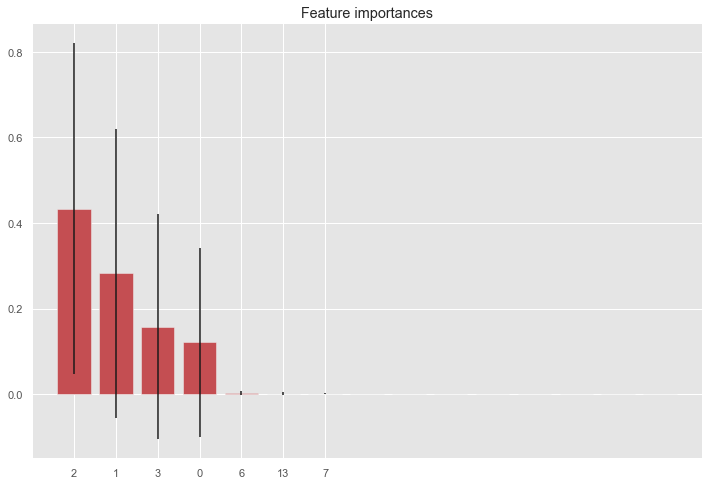

In [77]:
# Feature importance

#import matplotlib as plt 
import matplotlib.pyplot as plt

importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (12,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()



In [78]:
X_train.columns

Index(['Base Price', 'Convenience fee', 'Selling Price', 'Platform fee',
       'Plan type_Family 2', 'Plan type_Family 3', 'Plan type_Family 4',
       'Plan type_Family 5', 'Plan type_Family 6', 'Plan type_Single',
       'Product name_Fleri Bronze', 'Product name_Fleri Gold',
       'Product name_Fleri Platinum', 'Product name_Fleri Silver',
       'Payment Schedule_Monthly'],
      dtype='object')

In [79]:
X.columns

Index(['Plan type', 'Product name', 'Payment Schedule', 'Base Price',
       'Convenience fee', 'Selling Price', 'Platform fee'],
      dtype='object')

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index = X_train.columns)
   .nlargest(4)
   .plot(kind='barh'))

ValueError: Unknown label type: 'continuous'

In [81]:
X_train.sum(axis='index')

Base Price                     2479.00
Convenience fee                3347.50
Selling Price                  5825.65
Platform fee                    173.53
Plan type_Family 2                0.00
Plan type_Family 3                4.00
Plan type_Family 4                4.00
Plan type_Family 5                4.00
Plan type_Family 6                2.00
Plan type_Single                 14.00
Product name_Fleri Bronze         7.00
Product name_Fleri Gold           7.00
Product name_Fleri Platinum       7.00
Product name_Fleri Silver         7.00
Payment Schedule_Monthly         28.00
dtype: float64

In [82]:
# Mean of predicted dataset

X_test.sum(axis='index')

Base Price                      775.00
Convenience fee                1046.60
Selling Price                  1821.25
Platform fee                     54.25
Plan type_Family 2                4.00
Plan type_Family 3                0.00
Plan type_Family 4                0.00
Plan type_Family 5                0.00
Plan type_Family 6                2.00
Plan type_Single                  2.00
Product name_Fleri Bronze         2.00
Product name_Fleri Gold           2.00
Product name_Fleri Platinum       2.00
Product name_Fleri Silver         2.00
Payment Schedule_Monthly          8.00
dtype: float64